In [10]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal
from scipy.fft import fft, ifft, fftshift
import librosa

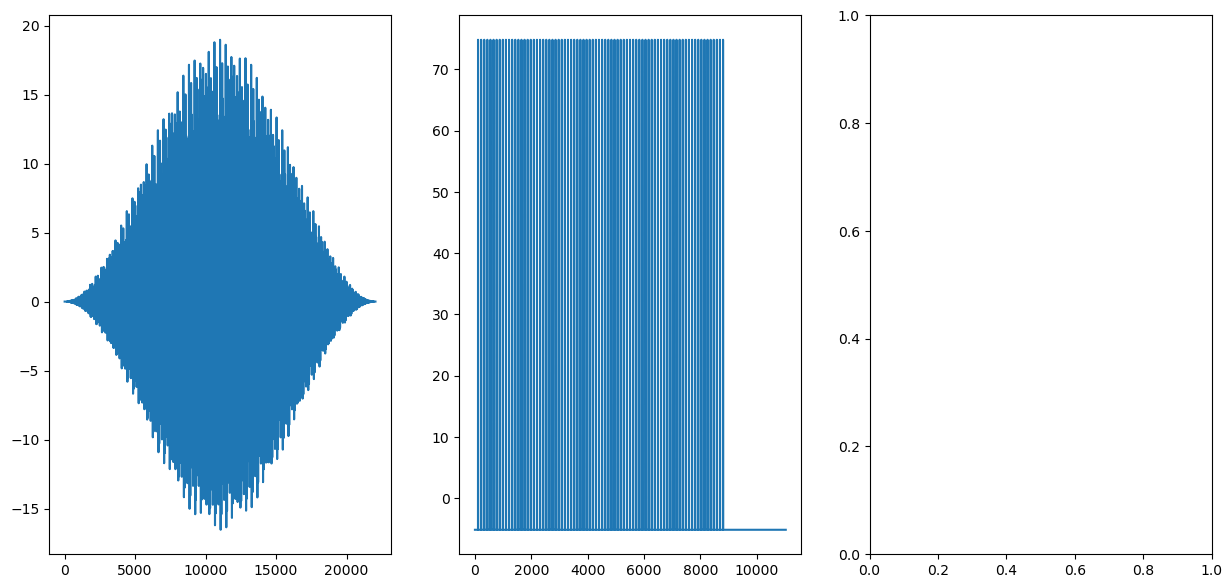

In [12]:
sr = 22050
f0 = 440.0/4.0
# f0 = 2.0
n_harm = 80
s = sr # second expressed as a number of samples
length = int(1.0 * s)
y = np.zeros(length)
t = np.arange(length)/sr
for i in range(n_harm):
    phase = np.random.rand(1)
    y += np.sin((i+1)*f0 * 2.0*np.pi*(t + phase))

fig, ax = plt.subplots(1, 3, figsize=[15, 7])
win = signal.windows.hann(len(y))
ax[0].plot(y*win)
ax[1].plot(librosa.amplitude_to_db(np.abs(fft(y*win)[:len(y)//2])))

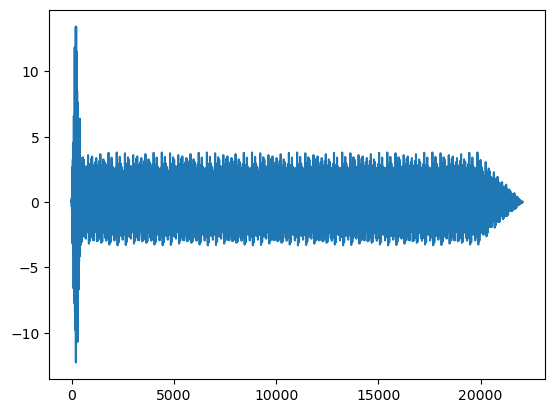

In [13]:
def adsr(x, attack=1.0/sr, decay=1.0/sr, sustain=1.0, release=1.0/sr, sr=22050):
    attack = int(attack*sr)
    decay = int(decay*sr)
    release = int(release*sr)
    
    out = x.copy()
    out[:attack] *= np.linspace(.0, 1.0, attack)
    out[attack:attack+decay+1] *= np.linspace(1.0, sustain, decay+1)
    out[attack+decay+1:] *= sustain
    out[-release:] *= np.linspace(1.0, .0, len(out[-release:]))
    return out

out = adsr(
    y, #np.ones(int(2.0 * s)),
    attack=0.01,
    decay=0.01,
    sustain=0.2,
    release=0.1
)
plt.plot(out)